In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [3]:
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [4]:
import utils.basic_geodesic_plotter as bgp
import utils.symbolic_variables as vrs

from geodesics_from_metric import geodesic_from_metric
from line_element_to_metric_tensor import line_element_to_metric_tensor

In [5]:
q, dq = vrs.create_variables_and_differentials(
    't, x, y, z',
    parameter_var_string=None
)

In [6]:
params_sym = vrs.create_param_variables('sigma R')
params_sym

Matrix([
[sigma],
[    R]])

In [7]:
q

Matrix([
[t],
[x],
[y],
[z]])

In [8]:
dq

Matrix([
[dt],
[dx],
[dy],
[dz]])

In [13]:
xs =  q[0]# try const velocity
vs = sym.diff(xs, q[0])
sym.Matrix([xs, vs])

Matrix([
[t],
[1]])

In [14]:
rs = sym.sqrt((q[1] - xs) ** 2 + q[2] ** 2 + q[3] ** 2)
rs

sqrt(y**2 + z**2 + (-t + x)**2)

In [15]:
fs = (sym.tanh(params_sym[0] * (rs + params_sym[1])) - sym.tanh(params_sym[0] * (rs - params_sym[1]))) / (2 * sym.tanh(params_sym[0] * params_sym[1]))
fs

(-tanh(sigma*(-R + sqrt(y**2 + z**2 + (-t + x)**2))) + tanh(sigma*(R + sqrt(y**2 + z**2 + (-t + x)**2))))/(2*tanh(R*sigma))

In [18]:
line_element = (
    -dq[0]  ** 2 + (dq[1] - vs * fs * dq[0]) ** 2 + dq[2] ** 2 + dq[3] ** 2
)
line_element

-dt**2 + dy**2 + dz**2 + (-dt*(-tanh(sigma*(-R + sqrt(y**2 + z**2 + (-t + x)**2))) + tanh(sigma*(R + sqrt(y**2 + z**2 + (-t + x)**2))))/(2*tanh(R*sigma)) + dx)**2

In [19]:
line_element_to_metric_tensor(line_element, dq)

Matrix([
[-1 + tanh(-R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))**2/(4*tanh(R*sigma)**2) - tanh(-R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))*tanh(R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))/(2*tanh(R*sigma)**2) + tanh(R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))**2/(4*tanh(R*sigma)**2), tanh(-R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))/(2*tanh(R*sigma)) - tanh(R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))/(2*tanh(R*sigma)), 0, 0],
[                                                                                                                                                                     tanh(-R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))/(2*tanh(R*sigma)) - tanh(R*sigma + sigma*sqrt(t**2 - 2*t*x + x**2 + y**2 + z**2))/(2*tanh(R*sigma)),                                                                                                                                                                 

In [38]:
# intial conditions
metric_tensor_params = [0.5, 0.01] # dummy var
# q0 = [0, 0, 1, 0]
# # initial 3-momentum
# p0 = [0, 1, 1]
q0 = np.random.normal(loc=0, scale=10, size=4)
q0[0] = 0
# initial 3-momentum
p0 = np.random.normal(loc=0, scale=2, size=3)
print(
    f'{q0} -- initial 4 position\n'
    f'{p0} -- initial 3 momentum'
)

[  0.          -0.47089835   1.99063489 -10.97012388] -- initial 4 position
[-0.57357069  4.08477505  2.02908605] -- initial 3 momentum


In [39]:
# geodesic
n_timesteps = 5500
delta = 0.5
geod = geodesic_from_metric(
    q, 
    dq,
    line_element,
    params_sym,
    q0, 
    p0, 
    metric_tensor_params,
    n_timesteps,
    delta,
    omega=1,
    order=2, 
    timelike=True,
    solve_p0_zeroth_term=True,
    neg_g_inv=True
)
print(
    f'{geod[0][0]} -- initial 4 position\n'
    f'{geod[0][1]} -- initial 4 momentum'
)


On iteration number 0 with delta 0.5
On iteration number 1000 with delta 0.5
On iteration number 2000 with delta 0.5
On iteration number 3000 with delta 0.5
On iteration number 4000 with delta 0.5
On iteration number 5000 with delta 0.5
8.97901580000007 -- sec to complete geodesic calculations.
[  0.          -0.47089835   1.99063489 -10.97012388] -- initial 4 position
[-4.4867881  -0.57357069  4.08477505  2.02908605] -- initial 4 momentum


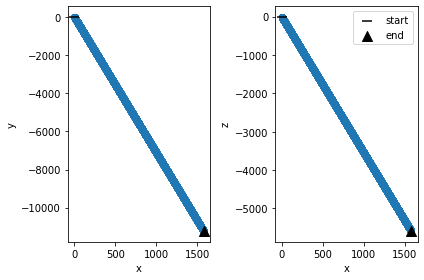

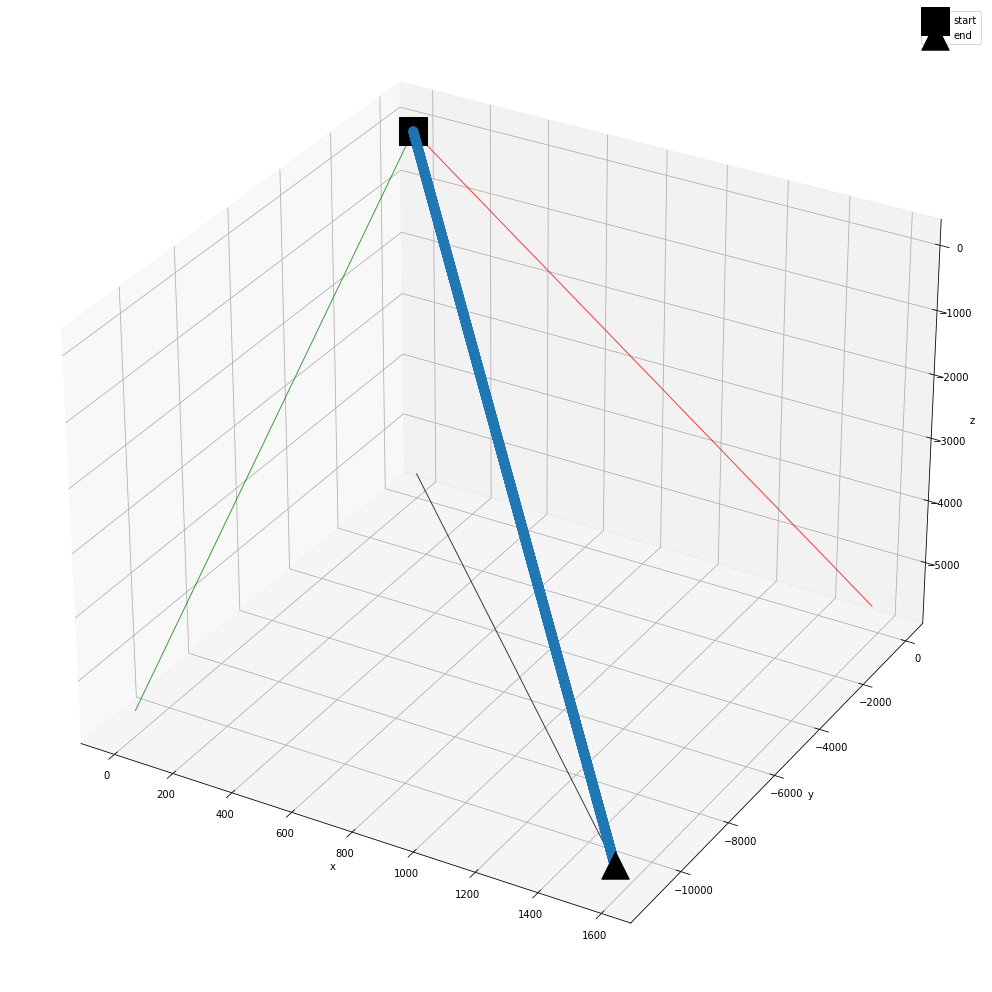

In [40]:
# two phase space should convege so will just pick first phase space
eqns_motion = np.array([i[0, :] for i in geod[1:]])

# stock coords
x = eqns_motion[:, 1]
y = eqns_motion[:, 2]
z = eqns_motion[:, 3]

bgp.geodesic_plotter_3d(x, y, z, axes_names=['x', 'y', 'z'])

In [ ]:
"""
arXiv:0904.4184 
@misc{mueller2010catalogue,
      title={Catalogue of Spacetimes}, 
      author={Thomas Mueller and Frank Grave},
      year={2010},
      eprint={0904.4184},
      archivePrefix={arXiv},
      primaryClass={gr-qc}
}
"""